In [1]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
import pathlib
import tensorflow as tf
import cv2
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings


In [3]:
# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = 'D:/Pemrograman/Python/Project/TensorFlow/workspace/training_demo/exported-models/my_model_3'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = 'D:/Pemrograman/Python/Project/TensorFlow/workspace/training_demo/annotations/jalanan/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Loading model...Done! Took 10.17746877670288 seconds


In [4]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

In [118]:
# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = 'D:/Pemrograman/Python/Project/TensorFlow/workspace/training_demo/images/jalanan_luar/test/img-9.jpg'
print('Running inference for {}... '.format(IMAGE_PATHS), end='')

Running inference for D:/Pemrograman/Python/Project/TensorFlow/workspace/training_demo/images/jalanan_luar/test/img-9.jpg... 

In [119]:
image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

array([[[123, 122, 131],
        [123, 122, 131],
        [122, 122, 128],
        ...,
        [121, 126, 129],
        [128, 133, 136],
        [128, 133, 136]],

       [[133, 132, 141],
        [120, 119, 128],
        [114, 114, 120],
        ...,
        [115, 120, 123],
        [116, 121, 124],
        [116, 121, 124]],

       [[124, 127, 132],
        [115, 118, 123],
        [127, 130, 135],
        ...,
        [131, 136, 139],
        [126, 131, 134],
        [120, 125, 128]],

       ...,

       [[ 77,  82,  81],
        [ 76,  81,  80],
        [ 78,  83,  82],
        ...,
        [ 68,  70,  70],
        [ 67,  69,  69],
        [ 69,  71,  71]],

       [[ 82,  87,  86],
        [ 84,  89,  88],
        [ 78,  83,  82],
        ...,
        [ 66,  68,  68],
        [ 65,  67,  67],
        [ 67,  69,  69]],

       [[ 95, 100,  99],
        [ 89,  94,  93],
        [ 79,  84,  83],
        ...,
        [ 71,  73,  73],
        [ 73,  75,  75],
        [ 78,  80,  80]]

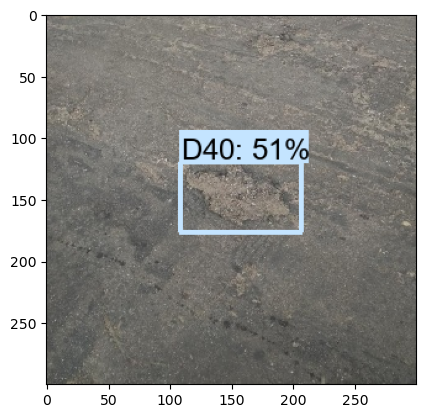

In [120]:
%matplotlib inline 
plt.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))
plt.show()